(273683,)


D:\anaconda3\envs\pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.37      0.13      0.19     10682
           1       0.42      0.84      0.56     19224
           2       0.50      0.44      0.47     13631
           3       0.00      0.00      0.00      4912
           4       1.00      0.00      0.01       811
           5       0.00      0.00      0.00      1720
           6       0.07      0.01      0.02      2822
           7       0.33      0.00      0.00       935

    accuracy                           0.43     54737
   macro avg       0.34      0.18      0.16     54737
weighted avg       0.37      0.43      0.35     54737



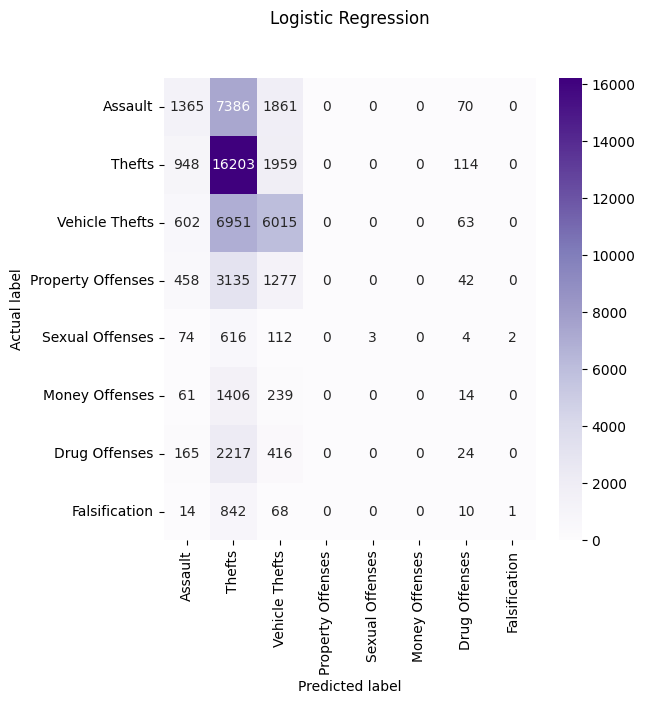

In [2]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import torch
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import RocCurveDisplay

dataset_path = 'df8.csv'
df = pd.read_csv(dataset_path)

from sklearn.preprocessing import StandardScaler

device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

df.head()

df = df.drop(columns=['HIGHEST_NIBRS_CODE', 'HIGHEST_NIBRS_DESCRIPTION', 'Violent-Crime'])

crime_type = df.pop('CRIME_TYPE')
y = df.pop('CRIME_TYPE_MAP').values
print(y.shape)
x = StandardScaler().fit_transform(df.values)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=69)
#Classification - no need to standardize outputs
classifier = LogisticRegression(penalty='l1', C=10, solver='saga', max_iter=10000)

classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
report = classification_report(y_test, y_pred)
cnf_matrix = confusion_matrix(y_test, y_pred)
#print(cnf_matrix)

class_names = ['Assault','Thefts','Vehicle Thefts','Property Offenses','Sexual Offenses','Money Offenses','Drug Offenses','Falsification']


# create heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,cmap='Purples',fmt='g', xticklabels=class_names, yticklabels=class_names)
tick_marks = np.arange(len(class_names))
plt.title('Logistic Regression' , y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print(report)